In [1]:
import urllib3
urllib3.disable_warnings()
import bs4
import pickle

import requests
from bs4 import BeautifulSoup
import sqlite3
from rake_nltk import Rake
import pandas as pd

In [2]:


### proxy information
proxy_host = '172.16.2.252'
proxy_port = '3128'

### Maintaining the first database

db = sqlite3.connect("iiserp.db")
cur = db.cursor()

cur.execute(" CREATE TABLE IISERP1(NAME , Education, Area, Details)")

# Create a dictionary with the proxy settings
proxies = {
    'http': f'http://{proxy_host}:{proxy_port}',
    'https': f'http://{proxy_host}:{proxy_port}',
}

#request for scrapping
url = 'https://www.iiserpune.ac.in/institute/people'
#url = "https://www.iisermohali.ac.in/faculty/people/faculty"

# Send an HTTP GET request to the URL
response = requests.get(url,proxies=proxies,verify=False)
# response = requests.get(url,verify=False)

#web parsering
soup = BeautifulSoup(response.text,'lxml')  #difference between html and lxml

# print(soup.prettify())
all_tags = soup.find_all('a')

index = 0
all_tags = all_tags[103:381]
all_tags = all_tags[1::2]

for tag in all_tags: #[118:225] the correct one!!
    index = index+1
    print(index)
    
    if index != 88: #exclude the 503 undispencreries.
    
        from lxml import html

        input_string = str(tag)
        
        # Parse the input string as HTML
        tree = html.fromstring(input_string)

        # Extract the href attribute value
        href_value = tree.xpath('//a/@href')  #getting the seperate link for each faculties

        # Check if an href attribute was found
        if href_value:
            
            #faculty_url = 'https://www.iiserpune.ac.in/research/department/biology/people/faculty/regular-faculty/rajesh-gokhale/375'
            
            faculty_url = 'https://www.iiserpune.ac.in' + str(href_value[0])
            faculty_response = requests.get(faculty_url,proxies=proxies,verify=False) #scrapping each faculty data.
            soup = BeautifulSoup(faculty_response.text,'lxml') #parsering it
            text = soup.text
            
            ## Name of the professor with Designation
            
            start_word = "Regular Faculty"
            end_word = "Professor"
            # Find the index of the start and end words in the text
            start_index = text.find(start_word)
            end_index = text.find(end_word)
            
            if start_index != -1 and end_index != -1:
                extracted_text = text[start_index + len(start_word)+35:end_index]
                name = extracted_text.strip()  # Use strip() to remove leading/trailing whitespace
                name = name.splitlines()[0]
                
            else:
                name = ''
                print("Start or end word not found in the text_name.")
                
                
                
            #Education
            
            element = soup.find('div', class_='rich-text markdown-text')
            text = element.get_text()
            text = text.strip()

            if len(text) != 0:
                education = text.splitlines()[0]
            
            else:
                education = ''
                print("Start or end word not found in the text_education.")
                
                
                

            #Research Area
            

            if len(text) != 0:
                area = text.splitlines()[2]
            
            else:
                area = ''
                print("Start or end word not found in the text_area.")
                
                
            
            #Research Details
            
            if index != 106 and index != 124:
                element = soup.find('div', class_='rich-text markdown-text')
                text = element.get_text()
                text = text.strip()

                if len(text) != 0:
                    research = text.splitlines()[3]

                else:
                    research = ''
                    print("Start or end word not found in the text_research.")



      

            
        else:
            print("No href attribute found.")
    ### table is created, just create the instance for the (name, research_focus, ...) into the sqlite3
    
        faculty_detail = (name,education, area, research)
        cur.execute("INSERT INTO IISERP1  VALUES (?, ?, ?, ?)", faculty_detail)


db.commit()

1
2
3
4
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
5
6
7
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
8
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
9
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
10
11
12
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
13
14
15
Start or end word not found in the text_education.
Start or end word not found in the text_area.
Start or end word not found in the text_research.
16
17
18
19
Start or end word not found in the text_education.
Start or end word n

In [3]:
#fetching

cur.execute("SELECT * FROM IISERP1") #we need to delete the table data and run the code once when the code is bug-free!!
rows = cur.fetchall()

st = ''' '''
r = Rake()

for row in rows:
    # print(row)
    st = st + ' ' + str(row[2])
    
frequency = []
keywords = []
experience_string = st
r.extract_keywords_from_text(st)
for freq ,keyword in r.get_ranked_phrases_with_scores():
    if freq > 10:
        print(freq,keyword)
        frequency.append(freq)
        keywords.append(keyword)



st = ''' '''
for row in rows:
    # print(row)
    st = st + ' ' + str(row[3])
    
frequency_tagline = []
keywords_tagline = []
tagline_string = r.extract_keywords_from_text(st)
for freq ,keyword in r.get_ranked_phrases_with_scores():
    if freq > 10:
        print(freq,keyword)
        frequency_tagline.append(freq)
        keywords_tagline.append(keyword)



### pickling the data!!    
data = {"frequency": frequency,
    "keyword": keywords,
    "frequency_tagline": frequency_tagline,
    "keyword_tagline": keywords_tagline,
    "experience_string" : experience_string,
    "tagline_string" : tagline_string
}    
with open('analysis_pune.pkl','wb') as file:
    pickle.dump(data, file)
db.close()
#### saving the important analysis using pickle


67.725 plants analytic number theory plasmodium epigenetics lab chromosome biology
64.11666666666667 mammalian lipid signalling pathways experimental particle physics theoretical biophysics
49.84722222222222 climate interaction redox chemical biology research extreme events
49.291666666666664 basin analysis organized tropical convective systems inorganic chemistry
38.2 chemical physics condensed matter physics characteristic classes
34.5 biophysics literary studies surface engineered nanomaterials
33.5 strategic planning towards climate education goals
33.39285714285714 podder also often studies combinatorial games played
33.25 enabling chemical biology technologies chemical biology
31.749999999999996 computational biophysics experimental condensed matter physics
31.166666666666668 experimental condensed matter physics developmental signalling
31.0 gibbs states ), recursive distributional equations
29.238095238095237 max planck india partner group head
26.1 medicine computational mater

In [41]:
#pickle to csv file to analyse the keywords

# Create a DataFrame from the lists
data1 = {'Column1': frequency, 'Column2': keywords}
#, 'Column3': frequency_tagline, 'Column 4': keywords_tagline}
df1 = pd.DataFrame(data1)

data2 = {'Column1': frequency_tagline, 'Column2': keywords_tagline}
df2 = pd.DataFrame(data2)
                  
# Print the DataFrame
print(df1)

file_path = 'research_1.csv'


df1.to_csv(file_path, index=False) 


   Column1                                            Column2
0        1  plants analytic number theory plasmodium epige...
1        1  mammalian lipid signalling pathways experiment...
2        1  climate interaction redox chemical biology res...
3        1  basin analysis organized tropical convective s...
4        1  chemical physics condensed matter physics char...
..     ...                                                ...
74       1                      classical perturbation theory
75       1                                  dark matter halos
76       1                          perfect information games
77       1                            potential theory groups
78       1                                 black hole physics

[79 rows x 2 columns]


In [37]:
import csv

# Initialize empty lists to store data
institutes_ = []
frequency_ = []
type_ = []



csv_file_path = '/Users/samannay/Desktop/indo.csv'

# Open the CSV file for reading
with open(csv_file_path, mode="r") as csv_file:
    reader = csv.reader(csv_file)

    # Skip the header row if it exists
    header = next(reader, None)

    # Iterate through the CSV rows and extract data into lists
    for row in reader:
        institutes, frequency,type__ = row
        institutes_.append(institutes)
        frequency_.append(int(frequency))
        type_.append(type__)



print("Total frequencies for all types:", type_frequency)

Total frequencies for all types: {'Others': 3, 'Central Research': 39, 'State Public': 8, 'Central University': 3, 'IIT': 16, 'Private': 5, 'NIT': 1}


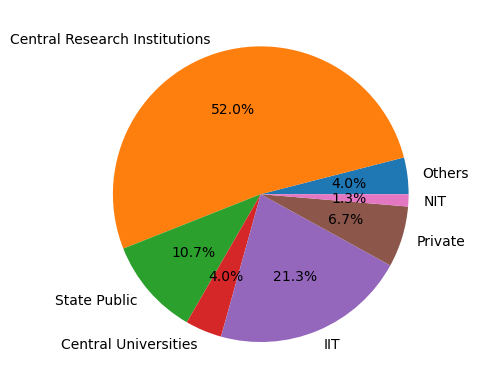

In [38]:
import matplotlib.pyplot as plt
import numpy as np

Types = ['Others', 'Central Research Institutions', 'State Public', 'Central Universities', 'IIT', 'Private', 'NIT']
Freq = [3, 39, 8, 3, 16, 5, 1]

plt.pie(Freq, labels = Types, autopct='%1.1f%%')
plt.savefig('/Users/samannay/Desktop/Indian_uni.png', dpi = 250)
plt.show() 

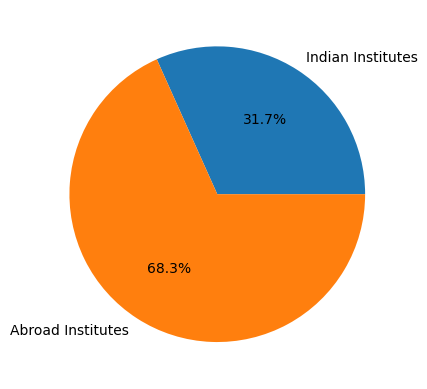

In [39]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([78, 168])
Types = ['Indian Institutes', 'Abroad Institutes']

plt.pie(y, labels = Types, autopct='%1.1f%%')
plt.savefig('/Users/samannay/Desktop/All_uni.png', dpi = 250)
plt.show() 